In [28]:
import pandas as pd

In [29]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\diabetes.csv")

In [30]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [32]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x, y)

In [34]:
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_res)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0, test_size=0.25)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

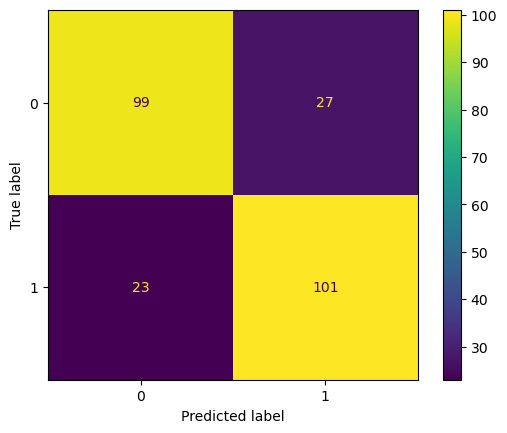

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       126
           1       0.79      0.81      0.80       124

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



In [40]:
accuracy_score(y_test, y_pred)

0.8

In [41]:
# we are training the model from k = 1 to 40, and storing the average of number of mismatch entries by a model in errors array
errors = []
import numpy as nm
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    errors.append(nm.mean(pred != y_test))

In [42]:
errors

[0.156,
 0.22,
 0.2,
 0.2,
 0.2,
 0.212,
 0.216,
 0.208,
 0.2,
 0.22,
 0.208,
 0.184,
 0.192,
 0.184,
 0.176,
 0.18,
 0.176,
 0.184,
 0.168,
 0.196,
 0.176,
 0.196,
 0.18,
 0.176,
 0.172,
 0.18,
 0.176,
 0.164,
 0.172,
 0.184,
 0.176,
 0.188,
 0.188,
 0.204,
 0.204,
 0.208,
 0.192,
 0.212,
 0.204,
 0.204]

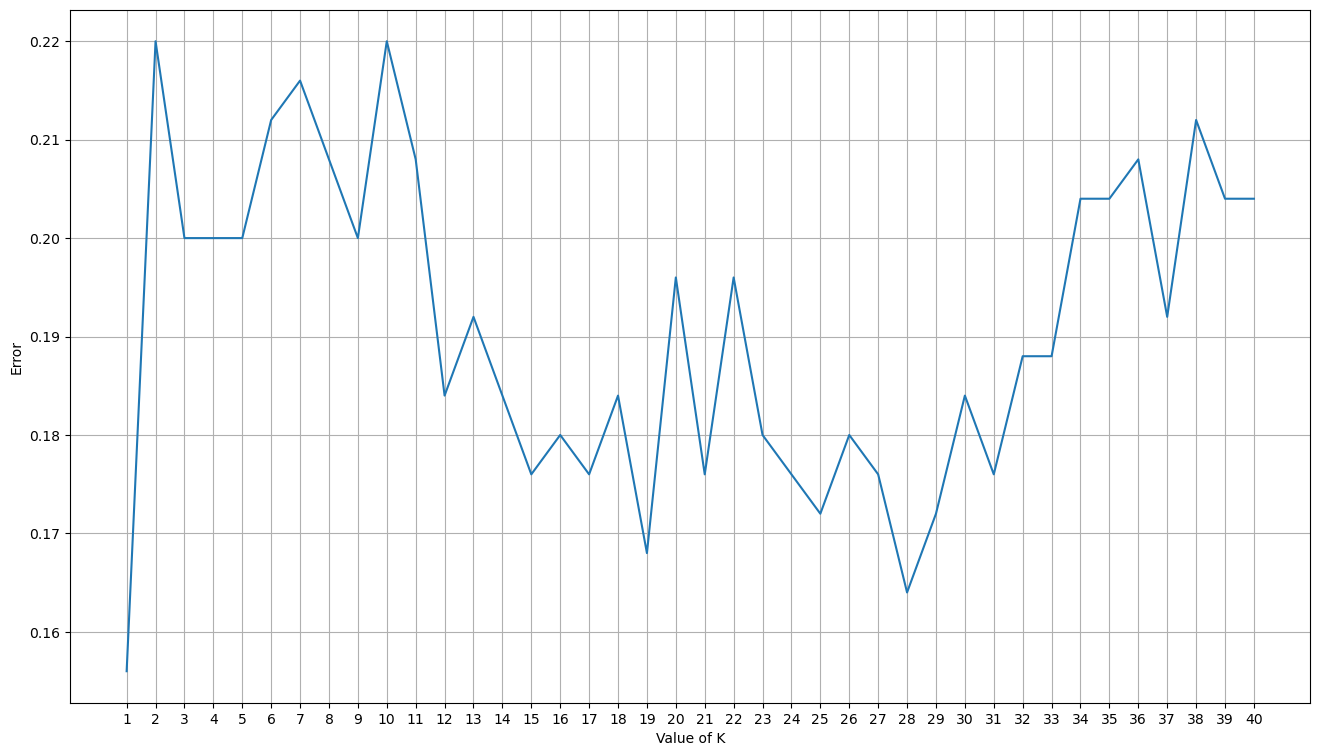

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.xlabel("Value of K")
plt.ylabel("Error")
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1, 41), errors)

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       126
           1       0.82      0.87      0.85       124

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



In [49]:
accuracy_score(y_test, y_pred)

0.844